In [1]:
%run Reactive_Air_shock_2T_last.py

# Results

In the following the results of several case studies are presented:
1. Standard air at $60 Km$ altitude, free stream velocity of $6 Km/s$
    * 11 species one-temperature mixture model
    * 11 species two-temperature mixture model
    * 7 species two-temperature mixture model
2. Standard air at $40 Km$ altitude, free stream velocity of $6 Km/s$
    * 11 species one-temperature mixture model
3. Standard air at $80 Km$ altitude, free stream velocity of $6 Km/s$
    * 11 species one-temperature mixture model
4. Air at the free-stream conditions presented in Expermental Methods for Studying Post Shock Relaxation [3], Queensland University
    * 11 species two-temperature mixture model
    * 7 species two-temperature mixture model

## 11 specie problem

As a first test case we compute the chemical relaxation post-shock at 60 Km of altitude with a free-stream velocity of $u_0 = 6Km/s$, which represents a typical velocity value for the reentry trajectory of space vehicles. The values of temperature and density are taken from the U.S. Standard Atmosphere Air Properties.
The composition of the gas in terms of mass fraction is assumed to be equal to $79\% N_2$ and $21\% O_2$. <br>
All the 11 species and the 47 reactions of Park's model [1] are considered. <br>
The solution is computed for both one-temperature and two-temperature mixture models, then the results are compared and analyzed.

In [2]:
_11specie = problem()

# Add species 
_11specie.add_specie_ic(O2, 0.21)
_11specie.add_specie_ic(N2, 0.79)
_11specie.add_specie_ic(NO,  0.0)
_11specie.add_specie_ic(N,  0)
_11specie.add_specie_ic(O,  0)
_11specie.add_specie_ic(O2p,  0.0)
_11specie.add_specie_ic(NOp,  0.0)
_11specie.add_specie_ic(N2p,  0.0)
_11specie.add_specie_ic(Np,  0.0)
_11specie.add_specie_ic(Op,  0.0)
_11specie.add_specie_ic(em,  0.0)

# Add reactions
_11specie.reaction.append(O2diss)
_11specie.reaction.append(N2diss)
_11specie.reaction.append(NOdiss)
_11specie.reaction.append(NO_O)
_11specie.reaction.append(O_N2)
_11specie.reaction.append(O_O2p)
_11specie.reaction.append(N2_Np)
_11specie.reaction.append(O_NOp )
_11specie.reaction.append(N2_Op)
_11specie.reaction.append(N_NOp)
_11specie.reaction.append(O2_NOp)
_11specie.reaction.append(NOp_N)
_11specie.reaction.append(O___N)
_11specie.reaction.append(O___O)
_11specie.reaction.append(N___N)
_11specie.reaction.append(O_ion)
_11specie.reaction.append(N_ion)

# Set ic
# _11specie.T0     = 300
# _11specie.rho0   = 10 / (287.05 * 300)
# _11specie.u0     = 10000

_11specie.T0     = 273.15 - 26.13 
_11specie.rho0   = 3.097e-4
_11specie.u0     = 6000

### 1 Temperature model

In [3]:
# Solve
_11specie.solve()
_11specie.postprocess()

Pre shock Mach : 18.977626837981823
******************************
Post-shock guess values:
rho    : 0.0018327556843828609
T      : 17531.821544944738
Speed  : 1013.883091911242
Mach   : 0.380654589983921
******************************
Post-shock values:
rho    : 0.002550900578885017
T      : 13315.518416899495
Tv     : 247.01999999999998
Speed  : 728.4486174730453
Mach   : 0.3385372185853052
******************************
Reference mean free path : 2.1592729644619046e-05



### 2 Temperature model

In [4]:
_11specie_2T = cp.deepcopy(_11specie)
_11specie_2T.solve_2T()
_11specie_2T.postprocess()

Pre shock Mach : 18.977626837981823
******************************
Post-shock guess values:
rho    : 0.0018327556843828609
T      : 17531.821544944738
Speed  : 1013.883091911242
Mach   : 0.380654589983921
******************************
Post-shock values:
rho    : 0.0018327556843828602
T      : 17531.82154494475
Tv     : 247.01999999999998
Speed  : 1013.8830919112426
Mach   : 0.4200041813142019
******************************
Reference mean free path : 2.1592729644619046e-05



### Plot

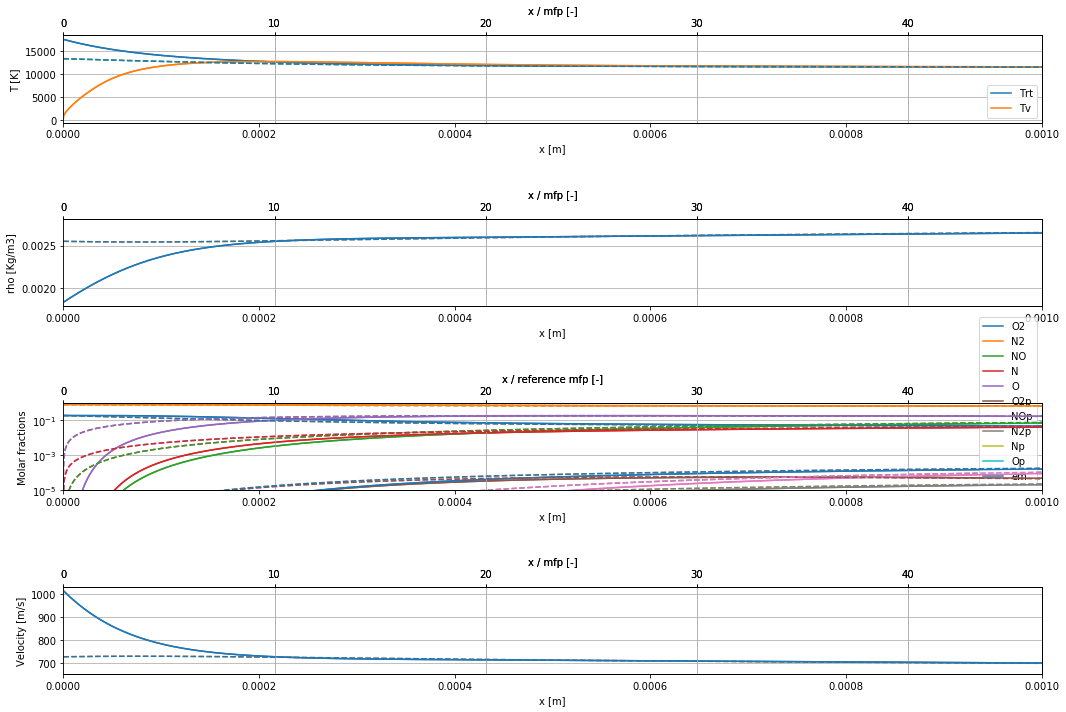

In [5]:
xmax = 1e-3
xmax_l = 3e7

fig, ax = plt.subplots(4, 1,)

_11specie_2T.plot_2T(ax[0], xmax = xmax)
_11specie_2T.plot_rho(ax[1], xmax = xmax)
_11specie_2T.logplot_X(ax[2], xmax = xmax)
_11specie_2T.plot_u(ax[3], xmax = xmax)

_11specie.plot_T(ax[0], xmax = xmax,ls = '--')
_11specie.plot_rho(ax[1], xmax = xmax,ls = '--')
_11specie.logplot_X(ax[2], xmax = xmax,ls = '--')
_11specie.plot_u(ax[3], xmax = xmax, ls = '--')

fig.tight_layout()

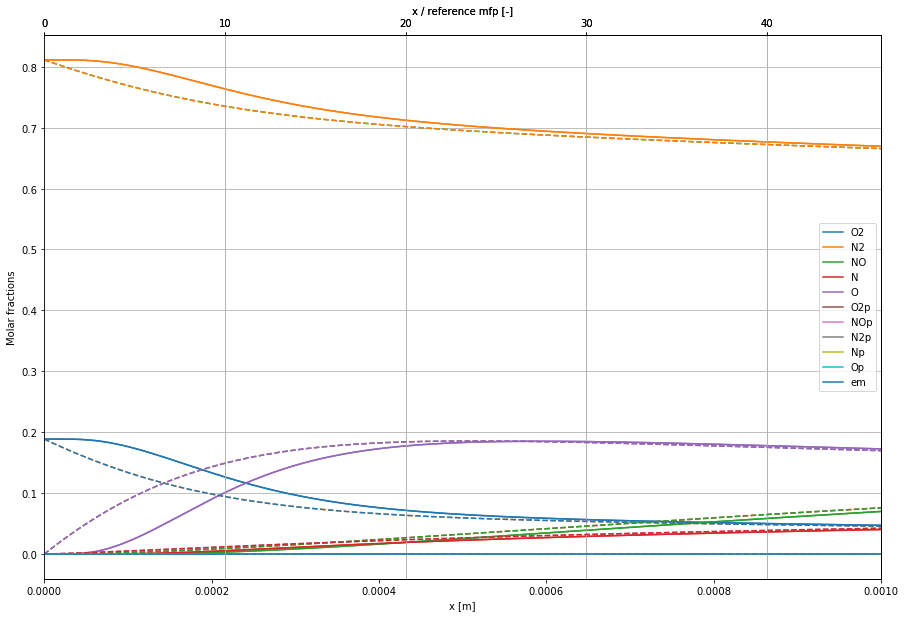

In [12]:
xmax = 1e-3
xmax_l = 3e7

ax = plt.axes()

_11specie_2T.plot_X(ax, xmax = xmax)

_11specie.plot_X(ax, xmax = xmax,ls = '--')

fig.tight_layout()

In [ ]:
ax = plt.axes()
ax.plot(_11specie.sol_x, _11specie.sol_p,'--')
ax.plot(_11specie_2T.sol_x, _11specie_2T.sol_p)
ax.set_xlim(0, 1e-3)

The plot above represents the temperature, density, molar fractions and velocity of the flow. Dotted lines are the solution of the one-temperature model. <br>

The flow proprerties reach the equilibrium after less than 50 reference mean free paths. For the hypotesis made the vibrational-electronic temperature past the shock is the same as its pre-shock value. For this reason, the energy jump across the shock will affect mainly the kinetic energy of the flow and its roto-translational temperature, resulting in values higher than those obtained with the one-temperature model. Post-shock speed is rapidly reduced from over $1000 m/s$ to about $730 m/s$ (in 10 reference mean free path) as the kinetic energy is consumed in favor of chemical reactions, leading to an increase of the gas density. Then they all relax until they reach the equilibrium values that is the same of the one temperature model. <br>
While the higher initial roto-translational temperature favors the dissociation of heavy molecules such as N2 and O2 in their N and O components, the plot of the evolution of the molar fractions shows that the reactions are slower because of the contribution given by the lower density which makes the two-temperature model slower to settle.

### Validate

The validation plots show that the flux of the conservative variables are constant up to a small tolerance for both misture models.

Maximum mass flux error       : 1.2743367155109934e-11
Maximum momentum flux error   : 1.8302061867015884e-11
Maximum enthalpy flux error   : 7.530491418568231e-06
Maximum mass frac error       : 8.053557820630886e-13
Last value of mass flux       : 1.858200000023658
Ymin                          : 0.0


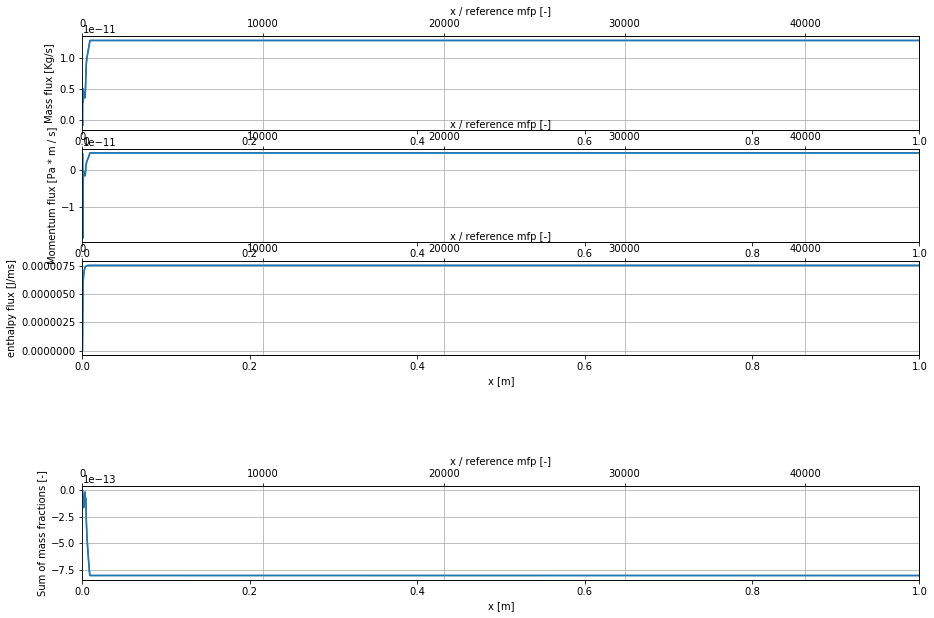

In [13]:
_11specie.validate()

Maximum mass flux error       : 3.36163008837126e-11
Maximum momentum flux error   : 3.3447399890898415e-11
Maximum energy flux error     : 5.468170935252123e-06
Maximum mass frac error       : 3.402833570476105e-13
Last value of mass flux       : 1.8582000000624601
Ymin                          : -3.8923675370333667e-72


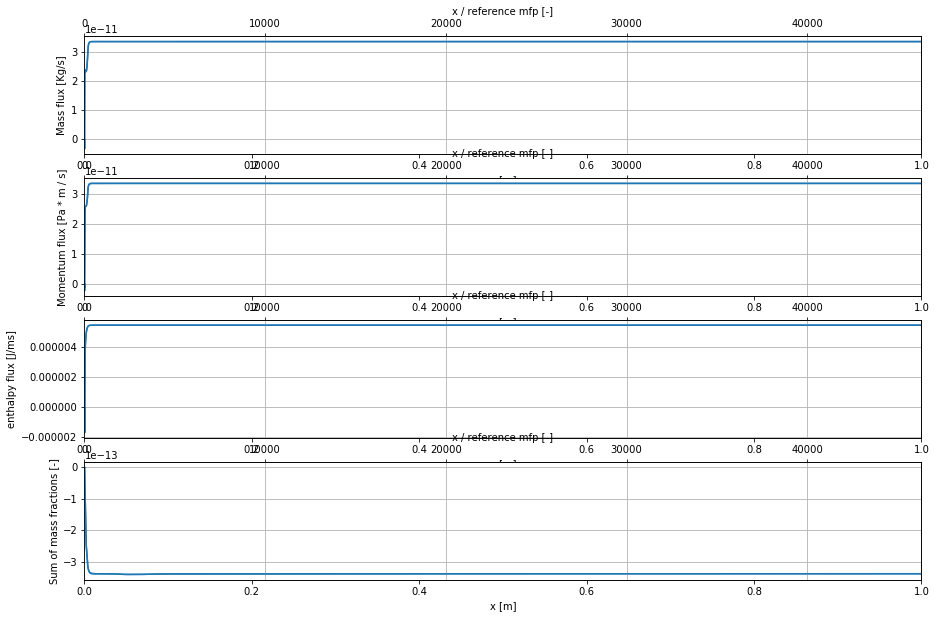

In [14]:
_11specie_2T.validate_2T()

## 7 specie problem

The same problem is studied by 7 species model.

In [15]:
_7specie_2T = problem()

# Add species 
_7specie_2T.add_specie_ic(O2, 0.21)
_7specie_2T.add_specie_ic(N2, 0.79)
_7specie_2T.add_specie_ic(NO,  0.0)
_7specie_2T.add_specie_ic(N,  0)
_7specie_2T.add_specie_ic(O,  0)
_7specie_2T.add_specie_ic(NOp,  0.0)
_7specie_2T.add_specie_ic(em,  0.0)

# Add reactions
_7specie_2T.reaction.append(O2diss_7s)
_7specie_2T.reaction.append(N2diss_7s)
_7specie_2T.reaction.append(NOdiss_7s)
_7specie_2T.reaction.append(NO_O)
_7specie_2T.reaction.append(O_N2)
_7specie_2T.reaction.append(O___N)

# Set ic
_7specie_2T.T0     = _11specie.T0     
_7specie_2T.rho0   = _11specie.rho0 
_7specie_2T.u0     = _11specie.u0

In [17]:
_7specie_2T.solve_2T()
_7specie_2T.postprocess()

Pre shock Mach : 18.977626837981823
******************************
Post-shock guess values:
rho    : 0.0018327556843828609
T      : 17531.821544944738
Speed  : 1013.883091911242
Mach   : 0.380654589983921
******************************
Post-shock values:
rho    : 0.0018327556843828602
T      : 17531.82154494475
Tv     : 247.01999999999998
Speed  : 1013.8830919112426
Mach   : 0.4200041813142019
******************************
Reference mean free path : 2.1592729644619046e-05



### Plot

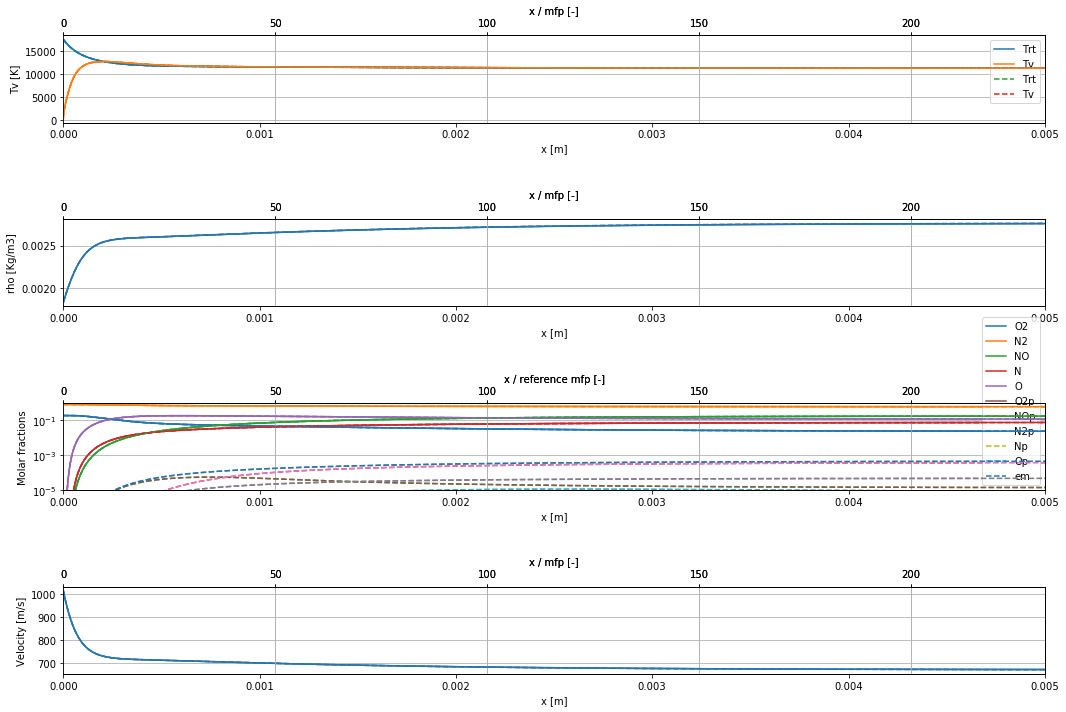

In [18]:
xmax = 5e-3
xmax_l = 3e7

fig, ax = plt.subplots(4, 1,)

_7specie_2T.plot_2T(ax[0], xmax = xmax)
_7specie_2T.plot_rho(ax[1], xmax = xmax)
_7specie_2T.logplot_X(ax[2], xmax = xmax)
_7specie_2T.plot_u(ax[3], xmax = xmax)

_11specie_2T.plot_2T(ax[0], xmax = xmax,ls = '--')
_11specie_2T.plot_rho(ax[1], xmax = xmax,ls = '--')
_11specie_2T.logplot_X(ax[2], xmax = xmax,ls = '--')
_11specie_2T.plot_u(ax[3], xmax = xmax, ls = '--')

fig.tight_layout()

For the condition considered there is no remarkable difference between the two models but in the molar fractions, where the 11 species model allows production of small amounts of ionized molecules.

## Effect of altitude (density)

### Lower altitude: 40Km (higher density)

To study how the flow in the relaxation zone behaves if the pre-shock mach number is about the same but the average molecular free path is lower, a flow with free-stream velocity of 6 km/s (typical value of space vehicles re-enry velocity) is analyzed but with the conditions of density and temperature at 40 Km altitude.

In [19]:
low_altitude = cp.deepcopy(_11specie)

# at 40 Km of altitude
low_altitude.T0 = 273.15 - 22.8
low_altitude.rho0 = 3.996e-3
low_altitude.u0 = _11specie.u0

low_altitude.solve()
low_altitude.postprocess()

Pre shock Mach : 18.850990022482666
******************************
Post-shock guess values:
rho    : 0.02364333250562184
T      : 17534.963959261022
Speed  : 1014.0702455670773
Mach   : 0.3806907392903729
******************************
Post-shock values:
rho    : 0.03290941899249966
T      : 13317.44513933993
Tv     : 250.34999999999997
Speed  : 728.5452230397748
Mach   : 0.33856225872955314
******************************
Reference mean free path : 1.673799494555518e-06



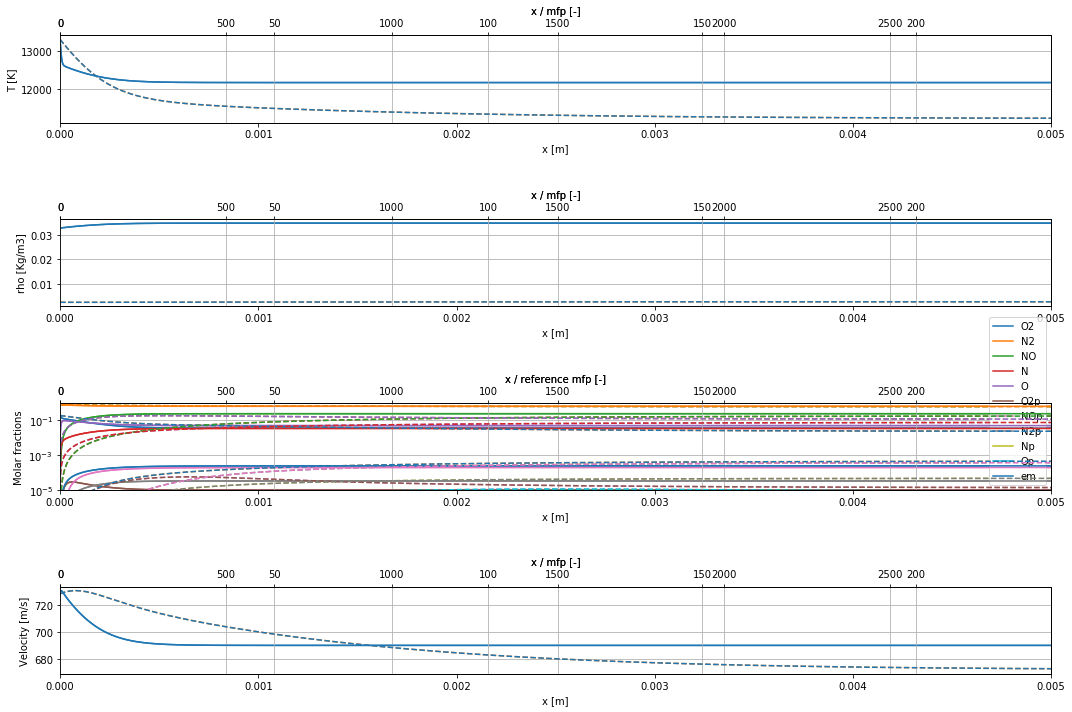

In [24]:
xmax = 5e-3
xmax_l = 3e7

fig, ax = plt.subplots(4, 1,)

low_altitude.plot_T(ax[0], xmax = xmax)
low_altitude.plot_rho(ax[1], xmax = xmax)
low_altitude.logplot_X(ax[2], xmax = xmax)
low_altitude.plot_u(ax[3], xmax = xmax)

_11specie.plot_T(ax[0], xmax = xmax,ls = '--')
_11specie.plot_rho(ax[1], xmax = xmax,ls = '--')
_11specie.logplot_X(ax[2], xmax = xmax,ls = '--')
_11specie.plot_u(ax[3], xmax = xmax, ls = '--')

fig.tight_layout()

While the values of velocity and temperature of the post-shock flow are very similar, their evolution as well as density values are noticeably different. The free mean molecular path is smaller, as well as the average collision time, which leads to a shorter relaxation region. To allow a more appropriate comparison, results are compared on a spatial coordiante scaled on mean free paths.

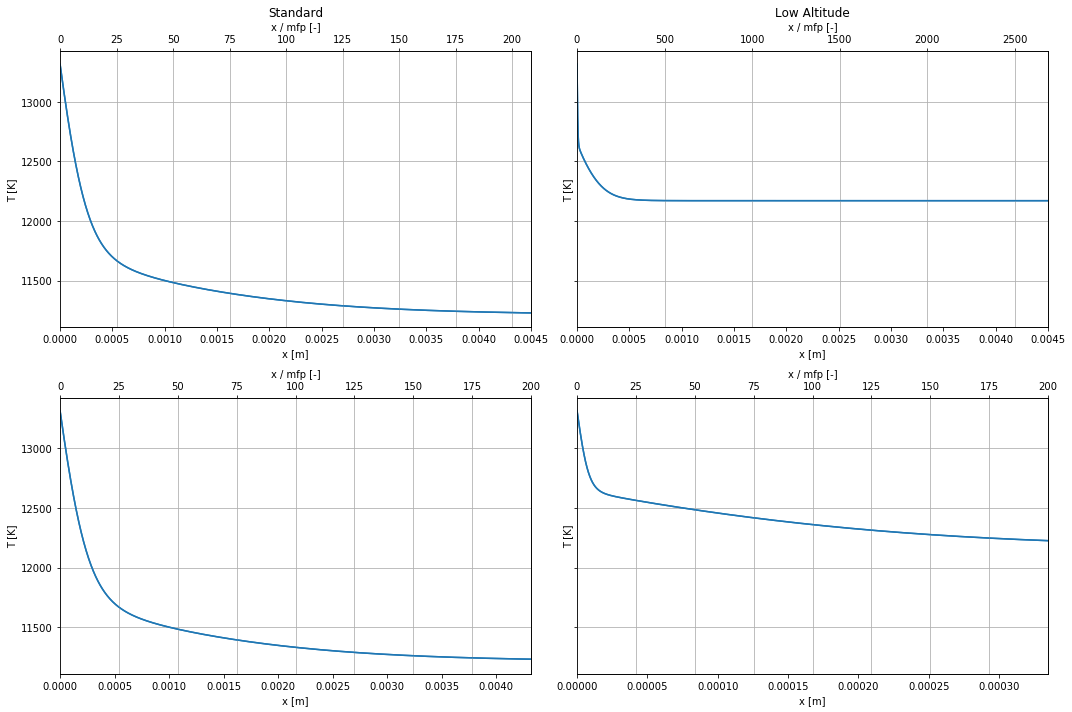

In [36]:
xmax = 4.5e-3
xmax_l = 2e2

fig, ax = plt.subplots(2,2, sharey = True)

_11specie.plot_T(ax[0,0], xmax = xmax)
ax[0,0].set_title('Air, 60 Km')

low_altitude.plot_T(ax[0,1], xmax = xmax)
ax[0, 1].set_title('Low Altitude')

_11specie.plot_T(ax[1,0], xmax_l = xmax_l)

low_altitude.plot_T(ax[1,1], xmax_l = xmax_l)

fig.tight_layout()

The upper plots show the temperature evolution in physical space (meters). The lower plots instead show the temperature evolution in terms on number of reference mean free paths. Despite the different initial conditions, the extension of the relaxation region measured in terms of mean free paths is approximately the same.

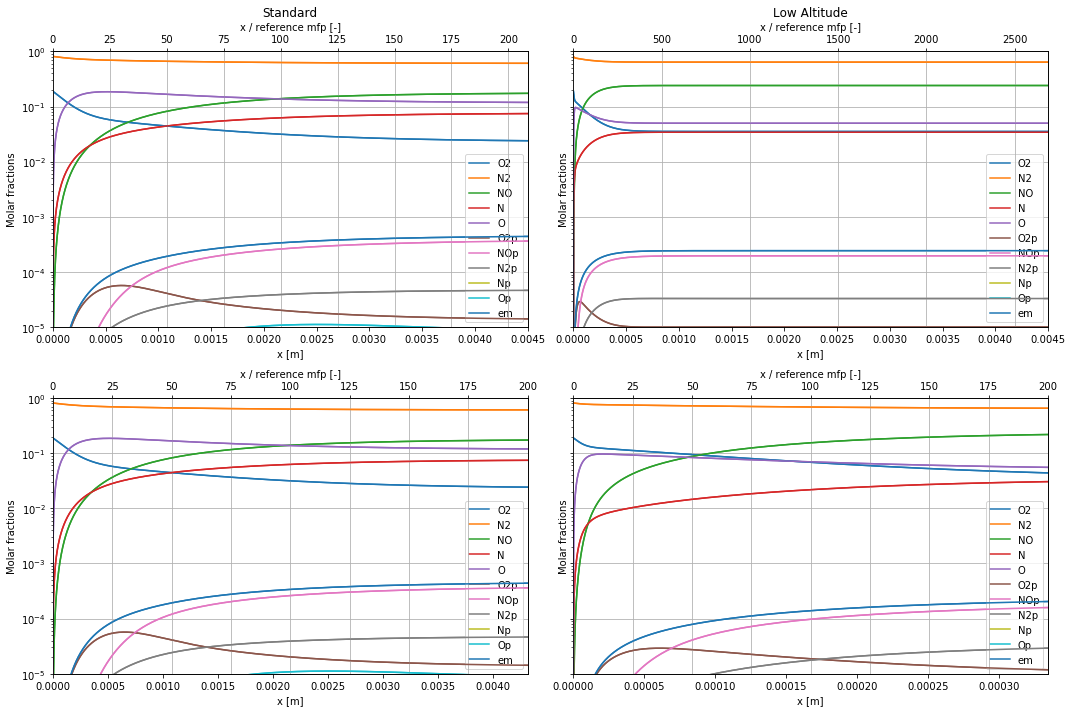

In [37]:
fig, ax = plt.subplots(2,2, sharey = True)

_11specie.logplot_X(ax[0,0], xmax = xmax)
ax[0,0].set_title('Air, 60 Km')

low_altitude.logplot_X(ax[0,1], xmax = xmax)
ax[0, 1].set_title('Air, 40 Km')

_11specie.logplot_X(ax[1,0], xmax_l = xmax_l)

low_altitude.logplot_X(ax[1,1], xmax_l = xmax_l)

fig.tight_layout()

The arguments aforementioned hold for the mass fractions evolution. Furthermore, heavier species like $NO, N_2, O_2$ are favored by the increased density, despite the higher temperature.

### Higher altitude: 80 Km (lower density)

A further study is made considering as initial conditions those of the air at the altitude of 80km. This analysis allows to study how the flow behaves in case of larger mean free paths and a higher pre-shock mach number.

In [25]:
high_altitude = cp.deepcopy(_11specie)

# at 80 Km of altitude
high_altitude.T0 = 273.15 - 74.51
high_altitude.rho0 = 1.846e-5
high_altitude.u0 = _11specie.u0

high_altitude.solve()
high_altitude.postprocess()

Pre shock Mach : 21.162872144357774
******************************
Post-shock guess values:
rho    : 0.00010953712483461731
T      : 17486.162983264207
Speed  : 1011.1640246832204
Mach   : 0.3801290496550789
******************************
Post-shock values:
rho    : 0.00015234301903586223
T      : 13287.505690929016
Tv     : 198.64
Speed  : 727.0434884447383
Mach   : 0.3381727767484634
******************************
Reference mean free path : 0.00036128571073294367



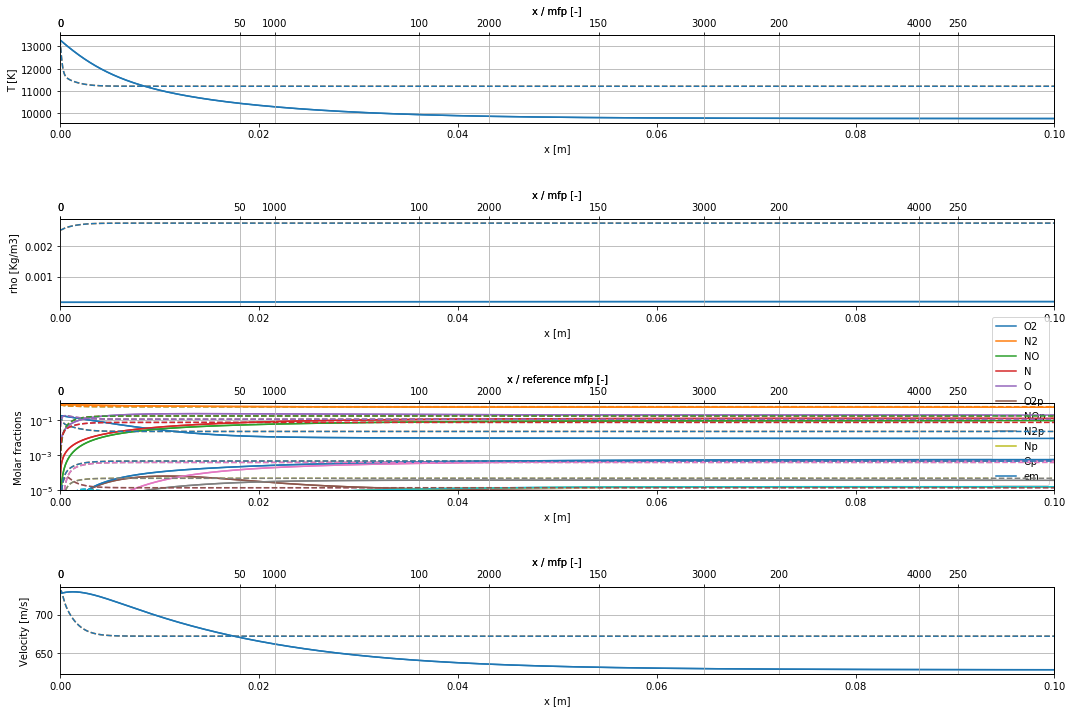

In [46]:
xmax = 1e-1
xmax_l = 3e7

fig, ax = plt.subplots(4, 1,)

high_altitude.plot_T(ax[0], xmax = xmax)
high_altitude.plot_rho(ax[1], xmax = xmax)
high_altitude.logplot_X(ax[2], xmax = xmax)
high_altitude.plot_u(ax[3], xmax = xmax)

_11specie.plot_T(ax[0], xmax = xmax,ls = '--')
_11specie.plot_rho(ax[1], xmax = xmax,ls = '--')
_11specie.logplot_X(ax[2], xmax = xmax,ls = '--')
_11specie.plot_u(ax[3], xmax = xmax, ls = '--')

fig.tight_layout()

As expected the relaxation region is longer, more physical space (meters) is required to achieve equilibrium.

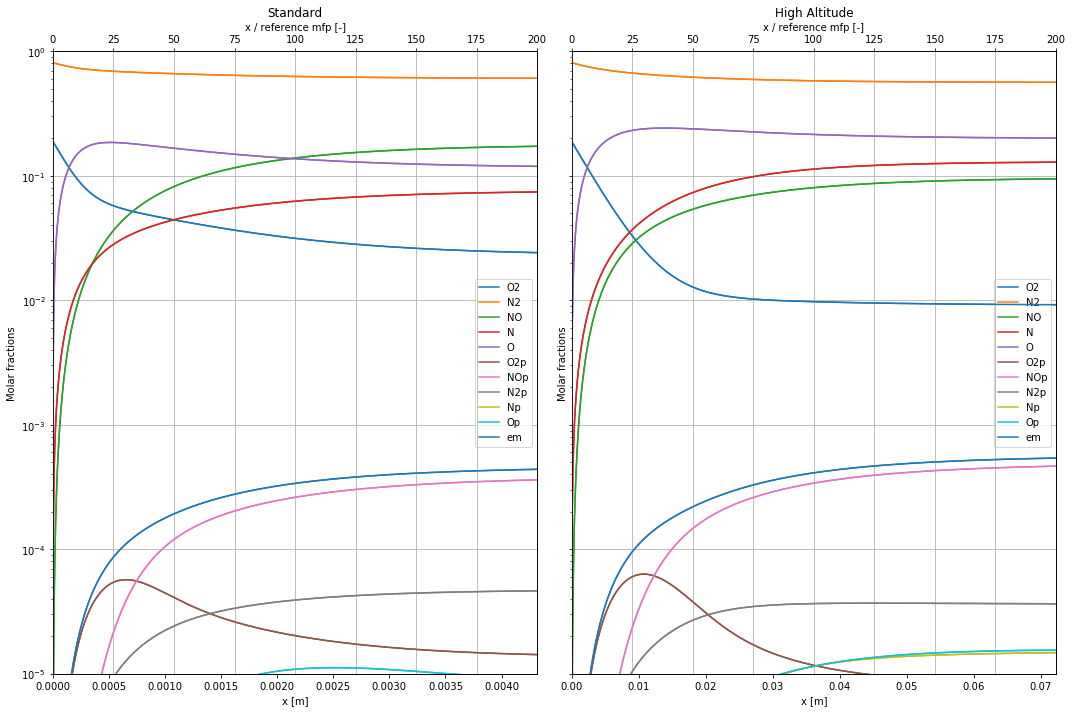

In [45]:
xmax = 4.5e-2
xmax_l = 2e2

fig, ax = plt.subplots(1,2, sharey = True)
ax[0].set_title('Air, 60 Km')
ax[1].set_title('Air, 80 Km')

_11specie.logplot_X(ax[0], xmax_l = xmax_l)
high_altitude.logplot_X(ax[1], xmax_l = xmax_l)

fig.tight_layout()

In accordance with what explained before, the lower density allows for a higher molar fraction of the lighter species, such as $O, N$. 

## Effect of temperature

### Queensland expansion tube [3]

To study the effect of higher temperature, the pre-shock conditions reported in Expermental Methods for Studying Post Shock Relaxation [3], are used as reference, despite the configuration. In this case, a hypersonic flow at high temperature and low density that simulates a re-entry into the Earth’s atmosphere is analyzed. 

#### 11 specie problem

In [49]:
_11specie_Q = cp.deepcopy(_11specie)

_11specie_Q.T0     = 2242
_11specie_Q.rho0   = 147/287.05/2242
_11specie_Q.u0     = 11.3*np.sqrt(1.4*287*2242) 

_11specie_Q.solve_2T()
_11specie_Q.postprocess()

Pre shock Mach : 11.260044859663642
******************************
Post-shock guess values:
rho    : 0.0013184928800620583
T      : 57387.77872917684
Speed  : 1858.0080880741618
Mach   : 0.38556233671715295
******************************
Post-shock values:
rho    : 0.0013184928800620578
T      : 57387.77872917686
Tv     : 2242
Speed  : 1858.0080880741627
Mach   : 0.4070895015889073
******************************
Reference mean free path : 3.0014722563883104e-05



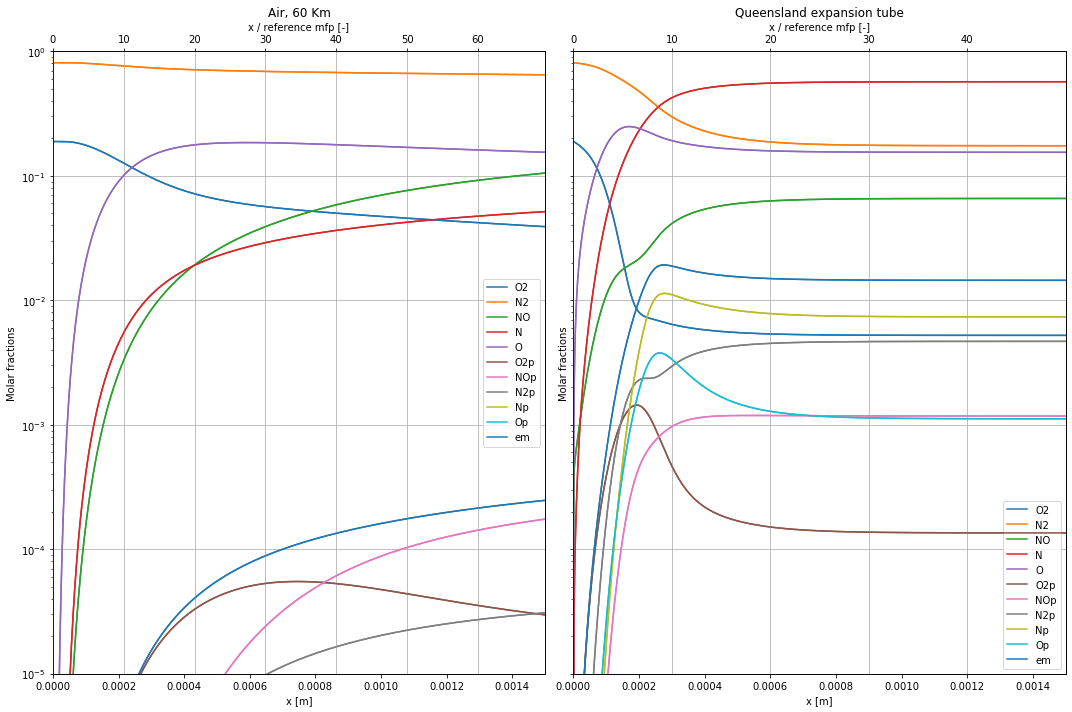

In [58]:
xmax = 1.5e-3

fig, ax = plt.subplots(1,2, sharey = True)

ax[0].set_title('Air, 60 Km')
ax[1].set_title('Queensland expansion tube')

_11specie_2T.logplot_X(ax[0], xmax = xmax)
_11specie_Q.logplot_X(ax[1], xmax = xmax)

fig.tight_layout()

The high temperature promotes dissociation and ionization. Since the composition of mixture changes abruptly and at the equilibrium the molar fraction of $N_2$ is $X_{N_2}\sim 20\%$, the mean free path of the mixture is quite different from the reference value, thus the outcome of the computation is shown in physical space.

#### 7 specie problem

In [29]:
_7specie_Q = cp.deepcopy(_7specie_2T)
_7specie_Q.T0     = 2242
_7specie_Q.rho0   = 147/287.05/2242
_7specie_Q.u0     = 11.3*np.sqrt(1.4*287*2242) 

_7specie_Q.solve_2T()
_7specie_Q.postprocess()

Pre shock Mach : 11.656272418316417
******************************
Post-shock guess values:
rho    : 0.0013218446040398329
T      : 61346.35174387339
Speed  : 1918.5124403046552
Mach   : 0.38505871793360874
******************************
Post-shock values:
rho    : 0.001321844604039832
T      : 61346.35174387341
Tv     : 2242
Speed  : 1918.5124403046564
Mach   : 0.40583674168487144
******************************
Reference mean free path : 2.9938615989028435e-05



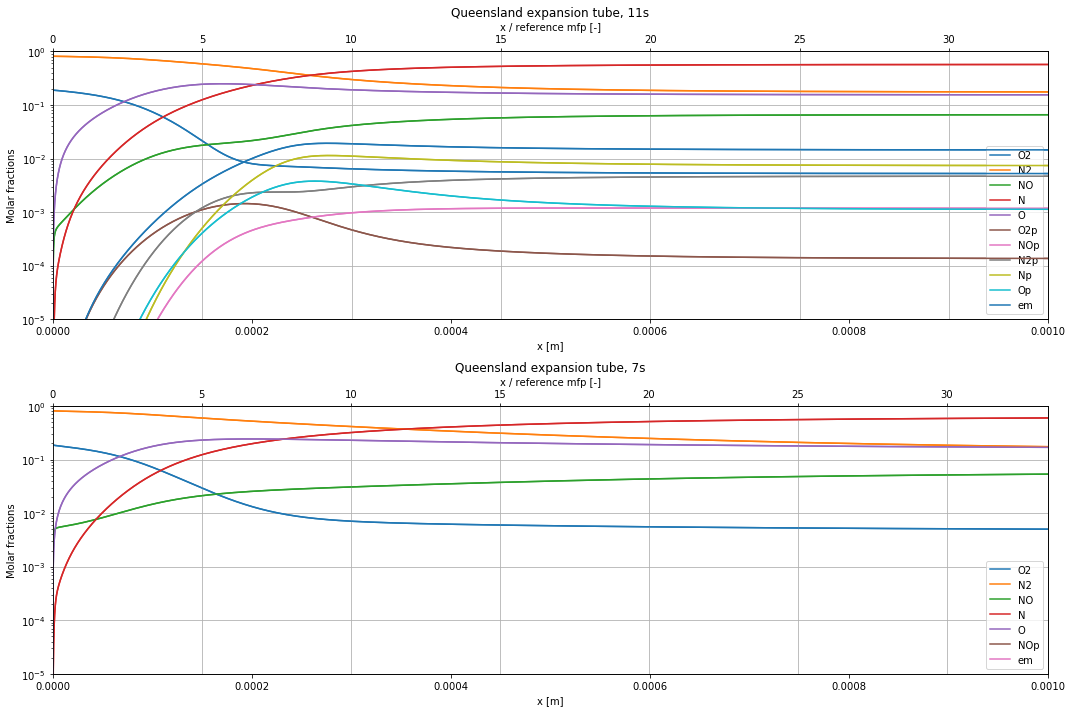

In [64]:
xmax = 1e-3

fig, ax = plt.subplots(2,1, sharey = True)

ax[0].set_title('Queensland expansion tube, 11s')
ax[1].set_title('Queensland expansion tube, 7s')

_11specie_Q.logplot_X(ax[0], xmax = xmax)
_7specie_Q.logplot_X(ax[1], xmax = xmax)

fig.tight_layout()

While the 7 specie mixture model at low temeperature is reliable, at high temperature, when molar fractions of ionized molecules become relevant, the description of mixture is incomplete.  

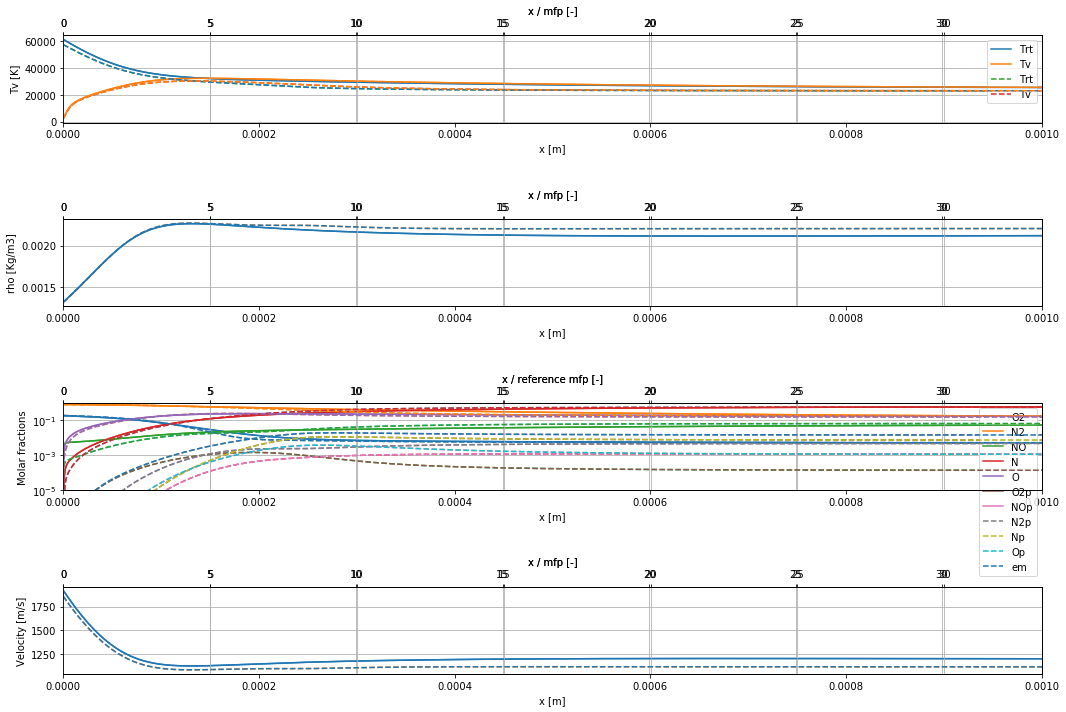

In [53]:
xmax = 1e-3
xmax_l = 3e7

fig, ax = plt.subplots(4, 1,)

_7specie_Q.plot_2T(ax[0], xmax = xmax)
_7specie_Q.plot_rho(ax[1], xmax = xmax)
_7specie_Q.logplot_X(ax[2], xmax = xmax)
_7specie_Q.plot_u(ax[3], xmax = xmax)

_11specie_Q.plot_2T(ax[0], xmax = xmax,ls = '--')
_11specie_Q.plot_rho(ax[1], xmax = xmax,ls = '--')
_11specie_Q.logplot_X(ax[2], xmax = xmax,ls = '--')
_11specie_Q.plot_u(ax[3], xmax = xmax, ls = '--')

fig.tight_layout()

The above mentioned fact 
The absence of ionized species 